# Optimización y Preparación de Datos para Análisis Predictivo en Seguros

### Explicación de Preprocesamiento

El preprocesamiento es un conjunto de procesos que se aplican a los datos antes de proceder a un análisis más detallado o modelado en el campo del aprendizaje automático y la ciencia de datos. Su objetivo es preparar los datos para que sean más adecuados para los algoritmos de análisis y ayudar a mejorar la precisión y eficacia de los resultados finales.

### Introducción

En este proyecto, se realiza un preprocesamiento exhaustivo de un conjunto de datos de seguros utilizando Python y diversas bibliotecas de manipulación y visualización de datos. El notebook proporciona una guía paso a paso para limpiar y preparar los datos, abordando problemas comunes como los valores faltantes, duplicados, y la estandarización de datos.

### Objetivos

Los principales objetivos de este proceso de preprocesamiento en el notebook son:

1. **Limpieza de Datos**: Identificar y tratar los valores nulos y duplicados para asegurar la integridad de los datos.
2. **Transformación de Variables**: Convertir variables categóricas en numéricas y estandarizar las escalas de las variables numéricas para facilitar su análisis.
3. **Normalización de Datos**: Aplicar técnicas como la normalización Min-Max para ajustar la escala de las características y permitir comparaciones más justas entre variables.
4. **Codificación de Variables Categóricas**: Utilizar técnicas como el encoding ordinal y one-hot encoding para transformar las variables categóricas en formatos que los modelos de aprendizaje automático puedan procesar eficazmente.
5. **Visualización de Correlaciones**: Explorar las relaciones entre variables para identificar posibles correlaciones que podrían influir en los modelos predictivos.

### Conclusión

El preprocesamiento es un paso crítico en cualquier proyecto de ciencia de datos que asegura que los datos estén en el formato adecuado y libres de errores antes de proceder con análisis más complejos. En este proyecto, se han establecido las bases para futuros análisis de datos o la construcción de modelos predictivos, garantizando que los datos estén limpios, bien estructurados y listos para ser utilizados de manera efectiva. Las técnicas empleadas en el notebook han permitido transformar un conjunto de datos crudo en un recurso valioso y utilizable para el modelado predictivo.

# 1. IMPORTACIÓN DE LIBRERIAS

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# 2. CONEXIÓN CON DRIVE Y LECTURA DE DATASETS

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_seguro = pd.read_csv("dataset_seguros_sin_nulos.csv")

# 3. ESTRUCTURA DE DATOS

In [ ]:
df_seguro.shape

(1338, 10)

In [ ]:
df_seguro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   EDAD              1338 non-null   int64  
 1   SEXO              1338 non-null   object 
 2   IMC               1338 non-null   float64
 3   PESO              1338 non-null   int64  
 4   HIJOS             1338 non-null   int64  
 5   CIUDAD            1338 non-null   object 
 6   PRECIO            1338 non-null   int64  
 7   INGRESO_SALARIAL  1338 non-null   object 
 8   FUMADOR           1338 non-null   bool   
 9   TIPO_COCHE        1338 non-null   object 
dtypes: bool(1), float64(1), int64(4), object(4)
memory usage: 95.5+ KB


In [ ]:
df_seguro.head()

,EDAD,SEXO,IMC,PESO,HIJOS,CIUDAD,PRECIO,INGRESO_SALARIAL,FUMADOR,TIPO_COCHE
0,37,MASCULINO,29.830,80,2,BARCELONA,534,ALTO,False,AUDI
1,25,MASCULINO,26.220,71,0,BARCELONA,227,MEDIO,False,AUDI
2,52,FEMENINO,30.780,83,1,BARCELONA,900,ALTO,False,SIN COCHE
3,23,MASCULINO,23.845,64,0,BARCELONA,200,BAJO,False,TOYOTA
4,60,FEMENINO,36.005,97,0,BARCELONA,1102,MEDIO,False,AUDI


In [ ]:
df_seguro.describe()

,EDAD,IMC,PESO,HIJOS,PRECIO
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.667231,82.444694,1.091928,1105.854260
std,14.049960,6.095439,16.389299,1.206345,1009.161649
min,18.000000,15.960000,43.000000,0.000000,93.000000
25%,27.000000,26.315000,71.000000,0.000000,395.250000
50%,39.000000,30.400000,82.000000,1.000000,781.500000
75%,51.000000,34.693750,93.000000,2.000000,1386.500000
max,64.000000,53.130000,143.000000,5.000000,5314.000000


# 4. DETECCIÓN DE NULOS

In [ ]:
df_seguro.isnull().sum()

EDAD                0
SEXO                0
IMC                 0
PESO                0
HIJOS               0
CIUDAD              0
PRECIO              0
INGRESO_SALARIAL    0
FUMADOR             0
TIPO_COCHE          0
dtype: int64

# 5. COMPROBACIÓN DE DUPLICADOS

In [ ]:
df_seguro[df_seguro.duplicated(keep = False)]

,EDAD,SEXO,IMC,PESO,HIJOS,CIUDAD,PRECIO,INGRESO_SALARIAL,FUMADOR,TIPO_COCHE


# 6. ANÁLISIS UNIVARIABLE

In [ ]:
df_seguro.columns

Index(['EDAD', 'SEXO', 'IMC', 'PESO', 'HIJOS', 'CIUDAD', 'PRECIO',
       'INGRESO_SALARIAL', 'FUMADOR', 'TIPO_COCHE'],
      dtype='object')

In [ ]:
for column in df_seguro.columns:
  print('\n', column, df_seguro[column].unique(), '\n')


 EDAD [37 25 52 23 60 34 63 18 35 24 38 58 43 31 22 45 59 56 30 44 26 61 20 32
 42 40 47 27 41 36 64 28 53 33 29 50 55 49 54 46 57 48 39 21 62 51 19] 


 SEXO ['MASCULINO' 'FEMENINO'] 


 IMC [29.83  26.22  30.78  23.845 36.005 31.92  23.085 26.315 36.67  26.6
 37.05  38.665 35.625 31.825 27.36  28.5   39.805 26.885 38.285 19.95
 25.46  30.115 32.205 28.595 23.75  31.35  28.785 26.505 22.04  22.42
 32.49  37.145 23.37  25.175 28.215 18.905 15.96  33.155 41.895 39.33
 28.88  27.74  41.23  33.25  31.635 22.135 28.975 17.29  25.365 24.32
 32.395 25.84  27.455 28.12  40.565 27.645 48.07  36.765 29.64  22.99
 27.55  22.61  34.865 32.775 37.335 40.945 34.105 36.385 35.72  32.3
 33.345 35.245 30.4   22.23  24.89  17.955 30.685 31.445 38.38  20.235
 17.195 30.59  27.265 31.73  16.815 29.45  38.095 25.935 31.065 25.08
 27.93  26.03  25.27  32.11  30.875 33.915 39.425 28.025 35.435 41.325
 33.44  32.68  36.86  34.295 23.465 35.91  21.85  33.725 26.98  19.
 33.535 22.705 38.19  26.41  31.54  32.

In [ ]:
for column in df_seguro.columns:
  print('\n', column, df_seguro[column].value_counts(), '\n')


 EDAD 18    69
19    68
45    29
52    29
51    29
47    29
48    29
20    29
46    29
50    29
27    28
25    28
26    28
53    28
49    28
22    28
54    28
23    28
21    28
24    28
28    28
43    27
44    27
31    27
42    27
40    27
30    27
41    27
29    27
55    26
33    26
57    26
32    26
56    26
34    26
36    25
59    25
58    25
38    25
35    25
39    25
37    25
61    23
63    23
62    23
60    23
64    22
Name: EDAD, dtype: int64 


 SEXO MASCULINO    678
FEMENINO     660
Name: SEXO, dtype: int64 


 IMC 32.300    13
28.310     9
30.495     8
30.875     8
30.800     8
          ..
40.480     1
26.070     1
24.090     1
28.380     1
44.700     1
Name: IMC, Length: 547, dtype: int64 


 PESO 80     46
75     41
83     35
74     34
78     34
       ..
132     1
46      1
43      1
129     1
123     1
Name: PESO, Length: 89, dtype: int64 


 HIJOS 0    577
1    322
2    239
3    157
4     25
5     18
Name: HIJOS, dtype: int64 


 CIUDAD MADRID       364
SEVILLA      32

# 7. SEPARAMOS LAS VARIABLES EN: TARGET, CATEGÓRICAS, BOOLEAN Y NUMERICAS

In [ ]:
df_seguro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   EDAD              1338 non-null   int64  
 1   SEXO              1338 non-null   object 
 2   IMC               1338 non-null   float64
 3   PESO              1338 non-null   int64  
 4   HIJOS             1338 non-null   int64  
 5   CIUDAD            1338 non-null   object 
 6   PRECIO            1338 non-null   int64  
 7   INGRESO_SALARIAL  1338 non-null   object 
 8   FUMADOR           1338 non-null   bool   
 9   TIPO_COCHE        1338 non-null   object 
dtypes: bool(1), float64(1), int64(4), object(4)
memory usage: 95.5+ KB


In [ ]:
df_seguro.head()

,EDAD,SEXO,IMC,PESO,HIJOS,CIUDAD,PRECIO,INGRESO_SALARIAL,FUMADOR,TIPO_COCHE
0,37,MASCULINO,29.830,80,2,BARCELONA,534,ALTO,False,AUDI
1,25,MASCULINO,26.220,71,0,BARCELONA,227,MEDIO,False,AUDI
2,52,FEMENINO,30.780,83,1,BARCELONA,900,ALTO,False,SIN COCHE
3,23,MASCULINO,23.845,64,0,BARCELONA,200,BAJO,False,TOYOTA
4,60,FEMENINO,36.005,97,0,BARCELONA,1102,MEDIO,False,AUDI


In [ ]:
df_seguro2 = df_seguro.copy()

In [ ]:
df_seguro2['FUMADOR_BOOL'] = df_seguro2['FUMADOR'].astype(int)

In [ ]:
df_seguro2.head()

,EDAD,SEXO,IMC,PESO,HIJOS,CIUDAD,PRECIO,INGRESO_SALARIAL,FUMADOR,TIPO_COCHE,FUMADOR_BOOL
0,37,MASCULINO,29.830,80,2,BARCELONA,534,ALTO,False,AUDI,0
1,25,MASCULINO,26.220,71,0,BARCELONA,227,MEDIO,False,AUDI,0
2,52,FEMENINO,30.780,83,1,BARCELONA,900,ALTO,False,SIN COCHE,0
3,23,MASCULINO,23.845,64,0,BARCELONA,200,BAJO,False,TOYOTA,0
4,60,FEMENINO,36.005,97,0,BARCELONA,1102,MEDIO,False,AUDI,0


In [ ]:
df_seguro2['FUMADOR_BOOL'].unique()

array([0, 1])

In [ ]:
del(df_seguro2['FUMADOR'])

In [ ]:
df_seguro2

,EDAD,SEXO,IMC,PESO,HIJOS,CIUDAD,PRECIO,INGRESO_SALARIAL,TIPO_COCHE,FUMADOR_BOOL
0,37,MASCULINO,29.830,80,2,BARCELONA,534,ALTO,AUDI,0
1,25,MASCULINO,26.220,71,0,BARCELONA,227,MEDIO,AUDI,0
2,52,FEMENINO,30.780,83,1,BARCELONA,900,ALTO,SIN COCHE,0
3,23,MASCULINO,23.845,64,0,BARCELONA,200,BAJO,TOYOTA,0
4,60,FEMENINO,36.005,97,0,BARCELONA,1102,MEDIO,AUDI,0
...,...,...,...,...,...,...,...,...,...,...
1333,19,FEMENINO,20.600,55,0,VALENCIA,144,ALTO,AUDI,0
1334,52,MASCULINO,38.600,104,2,VALENCIA,860,ALTO,TOYOTA,0
1335,23,FEMENINO,33.400,90,0,VALENCIA,900,MEDIO,AUDI,0
1336,52,FEMENINO,44.700,120,3,VALENCIA,951,MEDIO,SEAT,0


In [ ]:
df_seguro2['SEXO_BOOL'] = np.where(df_seguro2['SEXO'] == 'MASCULINO', 0, 1)

In [ ]:
df_seguro2['SEXO_BOOL'].value_counts()

0    678
1    660
Name: SEXO_BOOL, dtype: int64

In [ ]:
df_seguro2['SEXO'].value_counts()

MASCULINO    678
FEMENINO     660
Name: SEXO, dtype: int64

In [ ]:
del(df_seguro2['SEXO'])

In [ ]:
df_seguro2

,EDAD,IMC,PESO,HIJOS,CIUDAD,PRECIO,INGRESO_SALARIAL,TIPO_COCHE,FUMADOR_BOOL,SEXO_BOOL
0,37,29.830,80,2,BARCELONA,534,ALTO,AUDI,0,0
1,25,26.220,71,0,BARCELONA,227,MEDIO,AUDI,0,0
2,52,30.780,83,1,BARCELONA,900,ALTO,SIN COCHE,0,1
3,23,23.845,64,0,BARCELONA,200,BAJO,TOYOTA,0,0
4,60,36.005,97,0,BARCELONA,1102,MEDIO,AUDI,0,1
...,...,...,...,...,...,...,...,...,...,...
1333,19,20.600,55,0,VALENCIA,144,ALTO,AUDI,0,1
1334,52,38.600,104,2,VALENCIA,860,ALTO,TOYOTA,0,0
1335,23,33.400,90,0,VALENCIA,900,MEDIO,AUDI,0,1
1336,52,44.700,120,3,VALENCIA,951,MEDIO,SEAT,0,1


In [ ]:
df_seguro2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   EDAD              1338 non-null   int64  
 1   IMC               1338 non-null   float64
 2   PESO              1338 non-null   int64  
 3   HIJOS             1338 non-null   int64  
 4   CIUDAD            1338 non-null   object 
 5   PRECIO            1338 non-null   int64  
 6   INGRESO_SALARIAL  1338 non-null   object 
 7   TIPO_COCHE        1338 non-null   object 
 8   FUMADOR_BOOL      1338 non-null   int64  
 9   SEXO_BOOL         1338 non-null   int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 104.7+ KB


Separacion

In [ ]:
target = ['PRECIO']

In [ ]:
def obtener_lista_variables(dataset):
  lista_numericas=[]
  lista_boolean=[]
  lista_categoricas=[]

  for i in dataset:
    if (dataset[i].dtype.kind=='f' or dataset[i].dtype.kind=='i') and len(dataset[i].unique())!= 2 and i not in target:
      lista_numericas.append(i)
    elif (dataset[i].dtype.kind=='f' or dataset[i].dtype.kind=='i') and len(dataset[i].unique())== 2 and i not in target:
      lista_boolean.append(i)
    elif (dataset[i].dtype.kind=='O') and i not in target:
      lista_categoricas.append(i)

  return lista_numericas, lista_boolean, lista_categoricas

In [ ]:
lista_numericas_seguro, lista_boolean_seguro, lista_categoricas_seguro = obtener_lista_variables(df_seguro2)

In [ ]:
lista_numericas_seguro

['EDAD', 'IMC', 'PESO', 'HIJOS']

In [ ]:
lista_boolean_seguro

['FUMADOR_BOOL', 'SEXO_BOOL']

In [ ]:
lista_categoricas_seguro

['CIUDAD', 'INGRESO_SALARIAL', 'TIPO_COCHE']

In [ ]:
print('Total de variables: ', len(df_seguro2.columns))
print(len(target), 'variable(s) a predecir')
print(len(lista_numericas_seguro), 'variables numéricas')
print(len(lista_boolean_seguro), 'variables boolean')
print(len(lista_categoricas_seguro), 'variables categóricas')

Total de variables:  10
1 variable(s) a predecir
4 variables numéricas
2 variables boolean
3 variables categóricas


# 8. LÓGICA DE LAS VARIABLES

[[<Axes: title={'center': 'EDAD'}>]]
[[<Axes: title={'center': 'IMC'}>]]
[[<Axes: title={'center': 'PESO'}>]]
[[<Axes: title={'center': 'HIJOS'}>]]


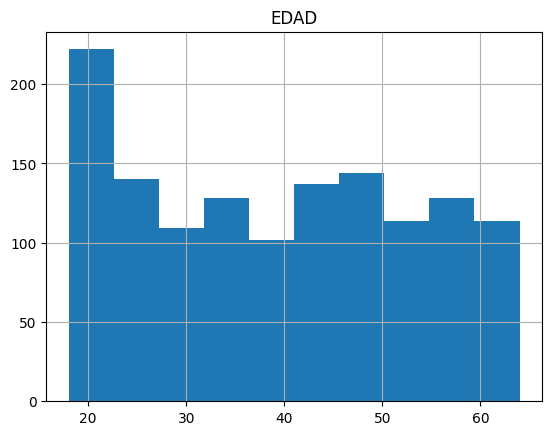

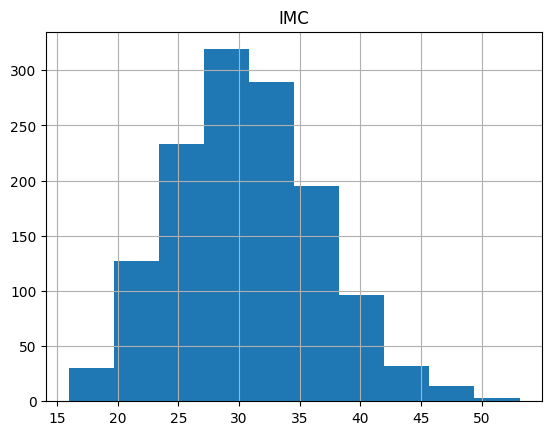

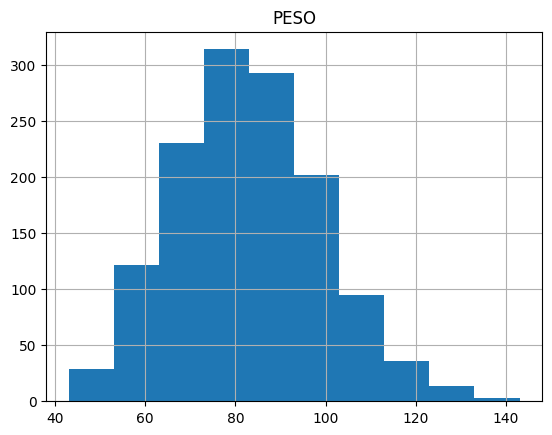

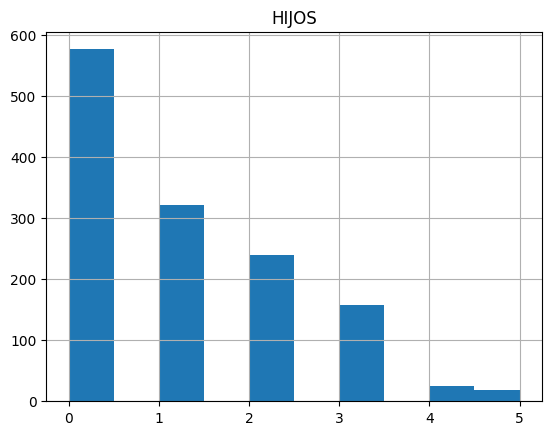

In [ ]:
for i in lista_numericas_seguro:
  print(df_seguro2.hist(i))

In [ ]:
for i in lista_categoricas_seguro:
  print(df_seguro2.value_counts(i))

CIUDAD
MADRID       364
SEVILLA      325
VALENCIA     325
BARCELONA    324
dtype: int64
INGRESO_SALARIAL
MEDIO    540
ALTO     438
BAJO     360
dtype: int64
TIPO_COCHE
AUDI         249
SIN COCHE    228
TOYOTA       228
FIAT         213
KIA          210
SEAT         210
dtype: int64


# 9. PREPROCESAMIENTO

In [ ]:
df_seguro3 = df_seguro2.copy()

In [ ]:
corr = df_seguro3.corr(numeric_only=True)

In [ ]:
corr

,EDAD,IMC,PESO,HIJOS,PRECIO,FUMADOR_BOOL,SEXO_BOOL
EDAD,1.000000,0.107672,0.110553,0.041946,0.299007,-0.025019,0.020581
IMC,0.107672,1.000000,0.997731,0.011162,0.197734,0.003433,-0.048773
PESO,0.110553,0.997731,1.000000,0.013555,0.199860,0.005331,-0.048953
HIJOS,0.041946,0.011162,0.013555,1.000000,0.066241,0.008926,-0.018189
PRECIO,0.299007,0.197734,0.199860,0.066241,1.000000,0.787255,-0.057284
FUMADOR_BOOL,-0.025019,0.003433,0.005331,0.008926,0.787255,1.000000,-0.074670
SEXO_BOOL,0.020581,-0.048773,-0.048953,-0.018189,-0.057284,-0.074670,1.000000


In [ ]:
corr.style.background_gradient(cmap='coolwarm')

,EDAD,IMC,PESO,HIJOS,PRECIO,FUMADOR_BOOL,SEXO_BOOL
EDAD,1.000000,0.107672,0.110553,0.041946,0.299007,-0.025019,0.020581
IMC,0.107672,1.000000,0.997731,0.011162,0.197734,0.003433,-0.048773
PESO,0.110553,0.997731,1.000000,0.013555,0.199860,0.005331,-0.048953
HIJOS,0.041946,0.011162,0.013555,1.000000,0.066241,0.008926,-0.018189
PRECIO,0.299007,0.197734,0.199860,0.066241,1.000000,0.787255,-0.057284
FUMADOR_BOOL,-0.025019,0.003433,0.005331,0.008926,0.787255,1.000000,-0.074670
SEXO_BOOL,0.020581,-0.048773,-0.048953,-0.018189,-0.057284,-0.074670,1.000000


In [ ]:
del(df_seguro3['PESO'])

In [ ]:
df_seguro3.head()

,EDAD,IMC,HIJOS,CIUDAD,PRECIO,INGRESO_SALARIAL,TIPO_COCHE,FUMADOR_BOOL,SEXO_BOOL
0,37,29.830,2,BARCELONA,534,ALTO,AUDI,0,0
1,25,26.220,0,BARCELONA,227,MEDIO,AUDI,0,0
2,52,30.780,1,BARCELONA,900,ALTO,SIN COCHE,0,1
3,23,23.845,0,BARCELONA,200,BAJO,TOYOTA,0,0
4,60,36.005,0,BARCELONA,1102,MEDIO,AUDI,0,1


array([[<Axes: title={'center': 'PRECIO'}>]], dtype=object)

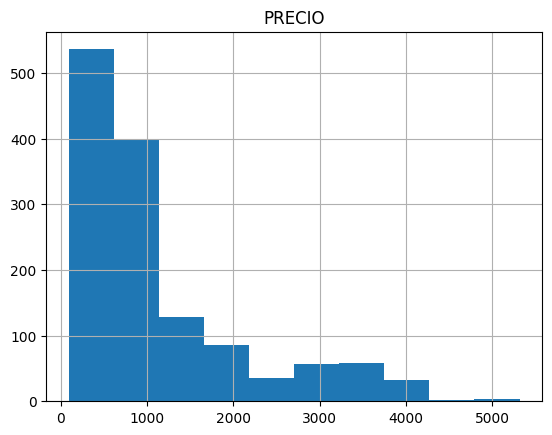

In [ ]:
df_seguro3.hist('PRECIO')

<Axes: xlabel='PRECIO'>

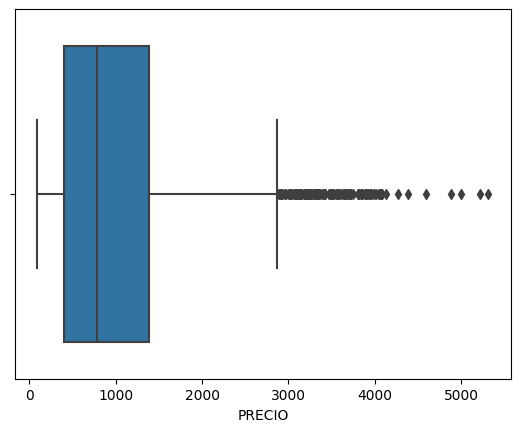

In [ ]:
sns.boxplot(x=df_seguro['PRECIO'])

In [ ]:
df_seguro3['LOG_PRECIO'] = np.log10(df_seguro['PRECIO'])

array([[<Axes: title={'center': 'LOG_PRECIO'}>]], dtype=object)

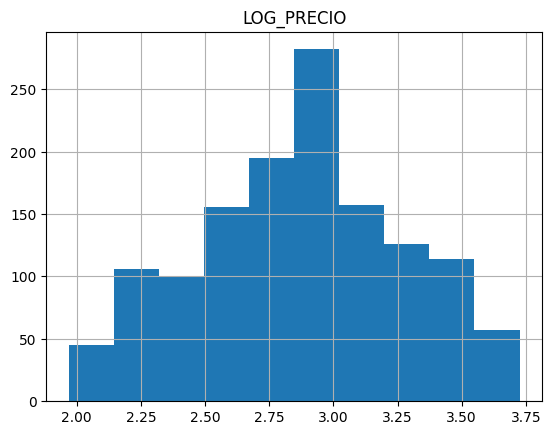

In [ ]:
df_seguro3.hist('LOG_PRECIO')

<Axes: xlabel='LOG_PRECIO'>

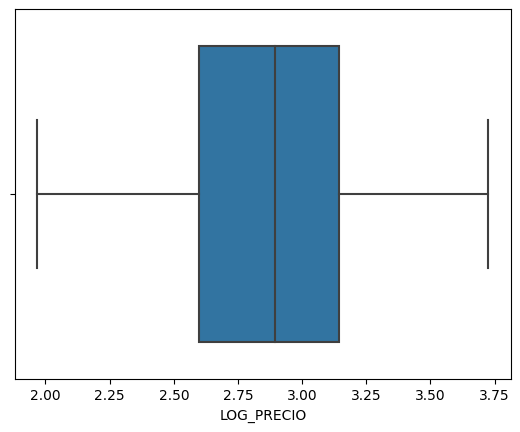

In [ ]:
sns.boxplot(x=df_seguro3['LOG_PRECIO'])

# 9.3 COMPACIÓN DE VARIABLES TARGET VS. VARIABLE INDEPENDIENTES

In [ ]:
df_seguro3.head()

,EDAD,IMC,HIJOS,CIUDAD,PRECIO,INGRESO_SALARIAL,TIPO_COCHE,FUMADOR_BOOL,SEXO_BOOL,LOG_PRECIO
0,37,29.830,2,BARCELONA,534,ALTO,AUDI,0,0,2.727541
1,25,26.220,0,BARCELONA,227,MEDIO,AUDI,0,0,2.356026
2,52,30.780,1,BARCELONA,900,ALTO,SIN COCHE,0,1,2.954243
3,23,23.845,0,BARCELONA,200,BAJO,TOYOTA,0,0,2.301030
4,60,36.005,0,BARCELONA,1102,MEDIO,AUDI,0,1,3.042182


<Axes: xlabel='SEXO_BOOL', ylabel='PRECIO'>

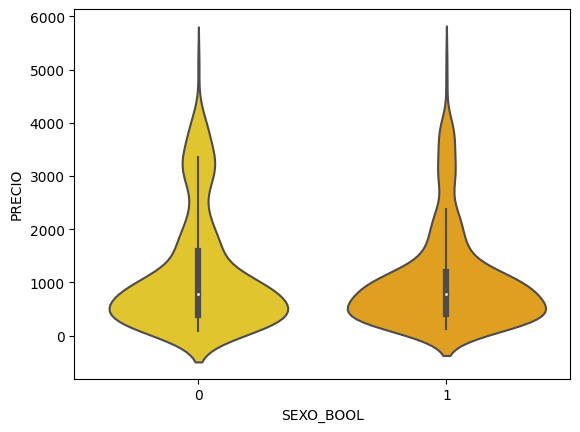

In [ ]:
sns.violinplot(x='SEXO_BOOL', y='PRECIO', data=df_seguro3, palette="Wistia")

<Axes: xlabel='FUMADOR_BOOL', ylabel='PRECIO'>

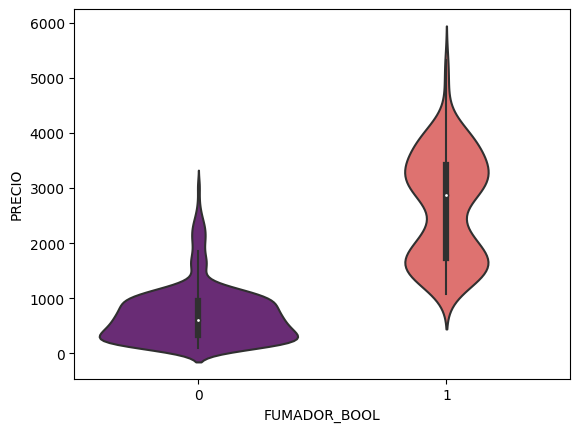

In [ ]:
sns.violinplot(x='FUMADOR_BOOL', y='PRECIO', data=df_seguro3, palette = 'magma')

<Axes: xlabel='HIJOS', ylabel='PRECIO'>

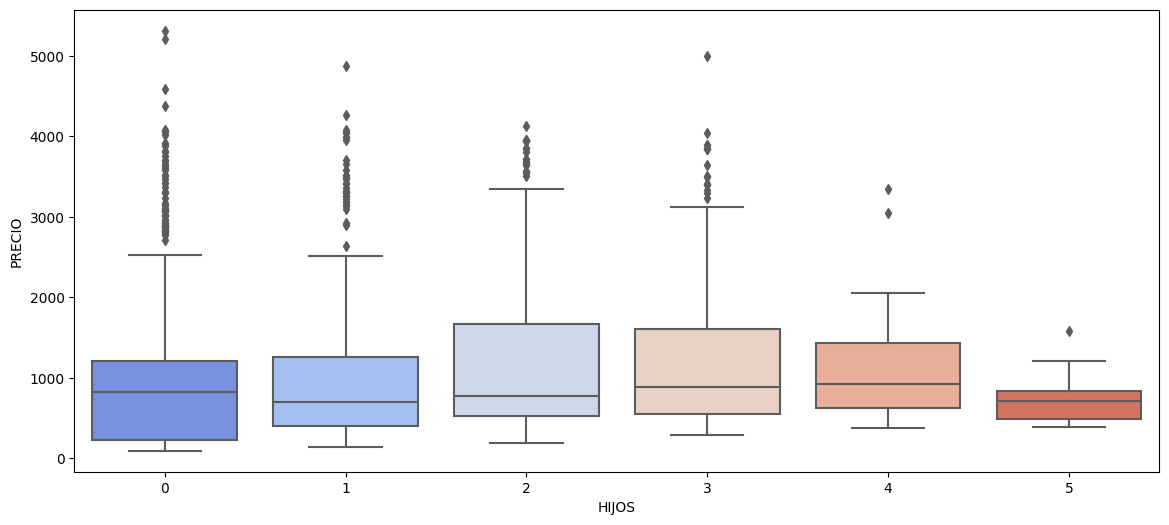

In [ ]:
plt.figure(figsize=(14,6))
sns.boxplot(x = 'HIJOS', y = 'PRECIO', data = df_seguro3, palette = 'coolwarm')

<Axes: xlabel='EDAD', ylabel='PRECIO'>

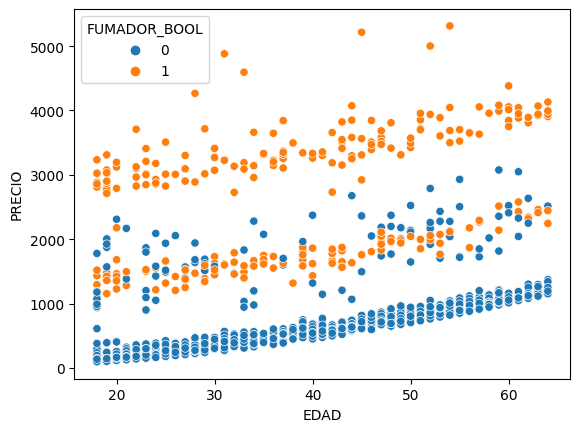

In [ ]:
sns.scatterplot(x='EDAD', y='PRECIO', hue='FUMADOR_BOOL', data=df_seguro3)

<Axes: xlabel='CIUDAD', ylabel='PRECIO'>

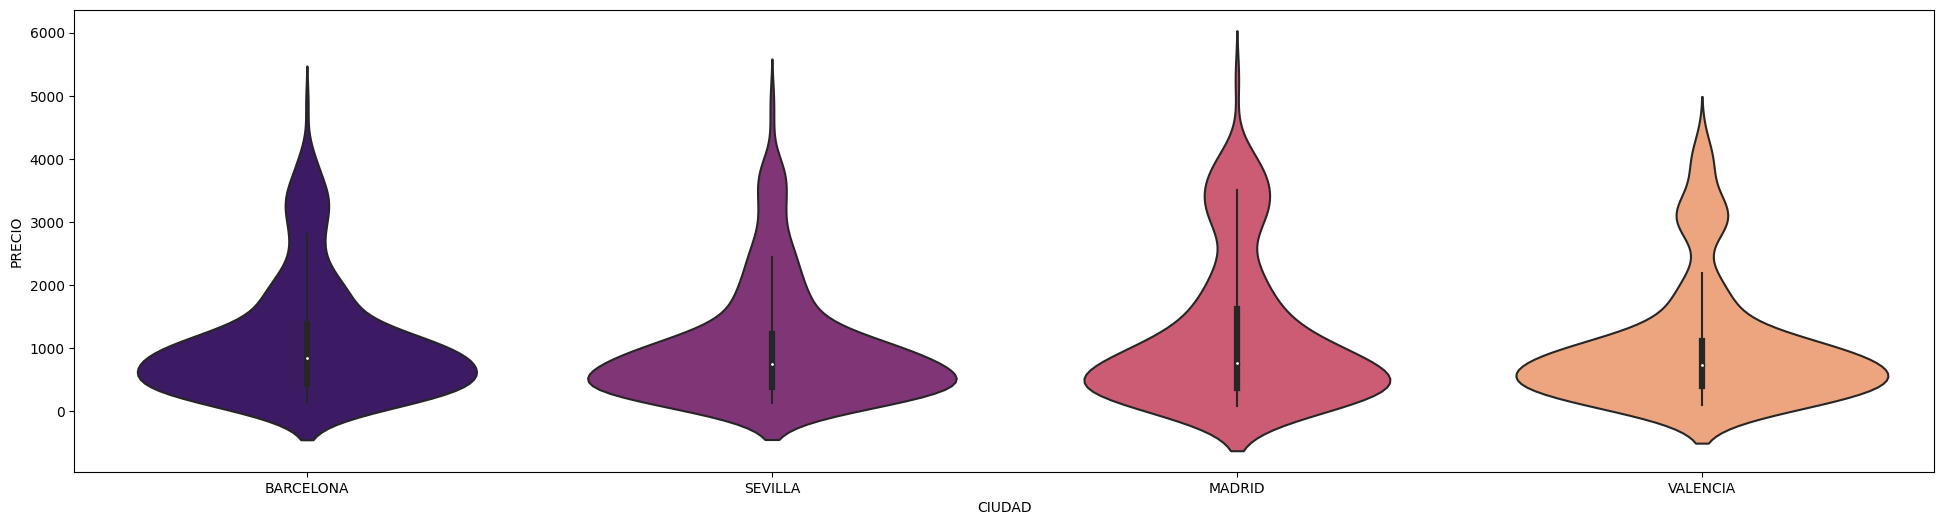

In [ ]:
plt.figure(figsize=(24,6))
sns.violinplot(x='CIUDAD', y='PRECIO', data=df_seguro3, palette='magma')

# 9.4 ESCALADO DE VARIABLES

In [ ]:
df_seguro3.dtypes

EDAD                  int64
IMC                 float64
HIJOS                 int64
CIUDAD               object
PRECIO                int64
INGRESO_SALARIAL     object
TIPO_COCHE           object
FUMADOR_BOOL          int64
SEXO_BOOL             int64
LOG_PRECIO          float64
dtype: object

In [ ]:
df_seguro4 = df_seguro3.copy()

In [ ]:
target=['PRECIO', 'LOG_PRECIO']

In [ ]:
var_numericas, var_boolean, var_categoricas = obtener_lista_variables(df_seguro4)

In [ ]:
var_numericas

['EDAD', 'IMC', 'HIJOS']

In [ ]:
var_boolean

['FUMADOR_BOOL', 'SEXO_BOOL']

In [ ]:
var_categoricas

['CIUDAD', 'INGRESO_SALARIAL', 'TIPO_COCHE']

In [ ]:
df_seguro4['INGRESO_SALARIAL'].unique()

array(['ALTO', 'MEDIO', 'BAJO'], dtype=object)

LabelEncoder

In [ ]:
le = LabelEncoder()

In [ ]:
df_seguro4['INGRESO_SALARIAL_INT'] = le.fit_transform(df_seguro4['INGRESO_SALARIAL'])

In [ ]:
df_seguro4['INGRESO_SALARIAL_INT'].unique()

array([0, 2, 1])

OrdinalEncoder

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
oe = OrdinalEncoder(categories=[['BAJO', 'MEDIO', 'ALTO']])

In [ ]:
oe

OrdinalEncoder(categories=[['BAJO', 'MEDIO', 'ALTO']])

In [ ]:
df_seguro4['INGRESO_SALARIAL_INT'] = oe.fit_transform(df_seguro4[['INGRESO_SALARIAL']])

In [ ]:
df_seguro4['INGRESO_SALARIAL_INT'].unique()

array([2., 1., 0.])

In [ ]:
df_seguro4['INGRESO_SALARIAL_INT'].value_counts()

1.0    540
2.0    438
0.0    360
Name: INGRESO_SALARIAL_INT, dtype: int64

In [ ]:
df_seguro4['INGRESO_SALARIAL'].value_counts()

MEDIO    540
ALTO     438
BAJO     360
Name: INGRESO_SALARIAL, dtype: int64

In [ ]:
var_categoricas.remove('INGRESO_SALARIAL')

In [ ]:
var_categoricas

['CIUDAD', 'TIPO_COCHE']

GET_DUMMIES

In [ ]:
df_seguro5 = pd.get_dummies(data=df_seguro4, columns=var_categoricas)

In [ ]:
df_seguro5.head()

,EDAD,IMC,HIJOS,PRECIO,INGRESO_SALARIAL,FUMADOR_BOOL,SEXO_BOOL,LOG_PRECIO,INGRESO_SALARIAL_INT,CIUDAD_BARCELONA,CIUDAD_MADRID,CIUDAD_SEVILLA,CIUDAD_VALENCIA,TIPO_COCHE_AUDI,TIPO_COCHE_FIAT,TIPO_COCHE_KIA,TIPO_COCHE_SEAT,TIPO_COCHE_SIN COCHE,TIPO_COCHE_TOYOTA
0,37,29.830,2,534,ALTO,0,0,2.727541,2.0,1,0,0,0,1,0,0,0,0,0
1,25,26.220,0,227,MEDIO,0,0,2.356026,1.0,1,0,0,0,1,0,0,0,0,0
2,52,30.780,1,900,ALTO,0,1,2.954243,2.0,1,0,0,0,0,0,0,0,1,0
3,23,23.845,0,200,BAJO,0,0,2.301030,0.0,1,0,0,0,0,0,0,0,0,1
4,60,36.005,0,1102,MEDIO,0,1,3.042182,1.0,1,0,0,0,1,0,0,0,0,0


In [ ]:
df_seguro5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   EDAD                  1338 non-null   int64  
 1   IMC                   1338 non-null   float64
 2   HIJOS                 1338 non-null   int64  
 3   PRECIO                1338 non-null   int64  
 4   INGRESO_SALARIAL      1338 non-null   object 
 5   FUMADOR_BOOL          1338 non-null   int64  
 6   SEXO_BOOL             1338 non-null   int64  
 7   LOG_PRECIO            1338 non-null   float64
 8   INGRESO_SALARIAL_INT  1338 non-null   float64
 9   CIUDAD_BARCELONA      1338 non-null   uint8  
 10  CIUDAD_MADRID         1338 non-null   uint8  
 11  CIUDAD_SEVILLA        1338 non-null   uint8  
 12  CIUDAD_VALENCIA       1338 non-null   uint8  
 13  TIPO_COCHE_AUDI       1338 non-null   uint8  
 14  TIPO_COCHE_FIAT       1338 non-null   uint8  
 15  TIPO_COCHE_KIA       

In [ ]:
del(df_seguro5['INGRESO_SALARIAL'])

In [ ]:
df_seguro5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   EDAD                  1338 non-null   int64  
 1   IMC                   1338 non-null   float64
 2   HIJOS                 1338 non-null   int64  
 3   PRECIO                1338 non-null   int64  
 4   FUMADOR_BOOL          1338 non-null   int64  
 5   SEXO_BOOL             1338 non-null   int64  
 6   LOG_PRECIO            1338 non-null   float64
 7   INGRESO_SALARIAL_INT  1338 non-null   float64
 8   CIUDAD_BARCELONA      1338 non-null   uint8  
 9   CIUDAD_MADRID         1338 non-null   uint8  
 10  CIUDAD_SEVILLA        1338 non-null   uint8  
 11  CIUDAD_VALENCIA       1338 non-null   uint8  
 12  TIPO_COCHE_AUDI       1338 non-null   uint8  
 13  TIPO_COCHE_FIAT       1338 non-null   uint8  
 14  TIPO_COCHE_KIA        1338 non-null   uint8  
 15  TIPO_COCHE_SEAT      

In [ ]:
corr = df_seguro5.corr(numeric_only=True)

In [ ]:
corr.style.background_gradient(cmap='coolwarm')

,EDAD,IMC,HIJOS,PRECIO,FUMADOR_BOOL,SEXO_BOOL,LOG_PRECIO,INGRESO_SALARIAL_INT,CIUDAD_BARCELONA,CIUDAD_MADRID,CIUDAD_SEVILLA,CIUDAD_VALENCIA,TIPO_COCHE_AUDI,TIPO_COCHE_FIAT,TIPO_COCHE_KIA,TIPO_COCHE_SEAT,TIPO_COCHE_SIN COCHE,TIPO_COCHE_TOYOTA
EDAD,1.000000,0.107672,0.041946,0.299007,-0.025019,0.020581,0.527839,-0.034009,0.002475,-0.011642,-0.000407,0.010016,-0.020585,-0.023868,-0.001094,-0.023038,0.012002,0.055877
IMC,0.107672,1.000000,0.011162,0.197734,0.003433,-0.048773,0.131753,-0.029758,-0.137105,0.269762,-0.136413,-0.006564,-0.050430,0.018777,-0.029598,0.001865,0.041254,0.019506
HIJOS,0.041946,0.011162,1.000000,0.066241,0.008926,-0.018189,0.159025,0.043323,-0.027177,-0.021534,0.026193,0.023302,0.047950,-0.039947,-0.007335,-0.022669,-0.013121,0.031386
PRECIO,0.299007,0.197734,0.066241,1.000000,0.787255,-0.057284,0.892961,-0.039010,0.006356,0.073979,-0.039910,-0.043210,-0.030941,0.006733,-0.030403,0.043423,0.014121,-0.001241
FUMADOR_BOOL,-0.025019,0.003433,0.008926,0.787255,1.000000,-0.074670,0.665503,-0.014365,0.002811,0.068498,-0.036945,-0.036945,-0.004716,0.027241,-0.030572,0.035618,-0.008328,-0.018179
SEXO_BOOL,0.020581,-0.048773,-0.018189,-0.057284,-0.074670,1.000000,-0.006242,-0.010629,-0.002864,-0.015290,0.012850,0.005878,0.027559,0.016069,0.001695,-0.043511,0.018025,-0.021734
LOG_PRECIO,0.527839,0.131753,0.159025,0.892961,0.665503,-0.006242,1.000000,-0.029511,0.043129,0.015820,-0.017855,-0.041645,-0.004750,0.001984,-0.045566,0.018693,0.005674,0.023310
INGRESO_SALARIAL_INT,-0.034009,-0.029758,0.043323,-0.039010,-0.014365,-0.010629,-0.029511,1.000000,-0.013339,-0.013565,-0.008931,0.036333,0.183252,-0.056815,-0.027327,-0.056676,-0.039472,-0.013659
CIUDAD_BARCELONA,0.002475,-0.137105,-0.027177,0.006356,0.002811,-0.002864,0.043129,-0.013339,1.000000,-0.345561,-0.320177,-0.320177,0.039019,-0.007527,0.043876,0.015098,-0.047380,-0.042740
CIUDAD_MADRID,-0.011642,0.269762,-0.021534,0.073979,0.068498,-0.015290,0.015820,-0.013565,-0.345561,1.000000,-0.346265,-0.346265,-0.042031,0.004838,-0.019068,0.031719,0.049015,-0.022454


In [ ]:
resultado_corr = df_seguro5.corr().unstack().sort_values(ascending=False)

In [ ]:
resultado_corr

EDAD              EDAD               1.000000
CIUDAD_MADRID     CIUDAD_MADRID      1.000000
PRECIO            PRECIO             1.000000
FUMADOR_BOOL      FUMADOR_BOOL       1.000000
SEXO_BOOL         SEXO_BOOL          1.000000
                                       ...   
CIUDAD_BARCELONA  CIUDAD_MADRID     -0.345561
CIUDAD_VALENCIA   CIUDAD_MADRID     -0.346265
CIUDAD_MADRID     CIUDAD_VALENCIA   -0.346265
                  CIUDAD_SEVILLA    -0.346265
CIUDAD_SEVILLA    CIUDAD_MADRID     -0.346265
Length: 324, dtype: float64

In [ ]:
resultado_df = resultado_corr.to_frame().reset_index()

In [ ]:
resultado_df.head()

,level_0,level_1,0
0,EDAD,EDAD,1.0
1,CIUDAD_MADRID,CIUDAD_MADRID,1.0
2,PRECIO,PRECIO,1.0
3,FUMADOR_BOOL,FUMADOR_BOOL,1.0
4,SEXO_BOOL,SEXO_BOOL,1.0


In [ ]:
print(resultado_df[(resultado_df['level_0'] != resultado_df['level_1'])].to_string())

                  level_0               level_1         0
18             LOG_PRECIO                PRECIO  0.892961
19                 PRECIO            LOG_PRECIO  0.892961
20           FUMADOR_BOOL                PRECIO  0.787255
21                 PRECIO          FUMADOR_BOOL  0.787255
22           FUMADOR_BOOL            LOG_PRECIO  0.665503
23             LOG_PRECIO          FUMADOR_BOOL  0.665503
24             LOG_PRECIO                  EDAD  0.527839
25                   EDAD            LOG_PRECIO  0.527839
26                   EDAD                PRECIO  0.299007
27                 PRECIO                  EDAD  0.299007
28          CIUDAD_MADRID                   IMC  0.269762
29                    IMC         CIUDAD_MADRID  0.269762
30                    IMC                PRECIO  0.197734
31                 PRECIO                   IMC  0.197734
32   INGRESO_SALARIAL_INT       TIPO_COCHE_AUDI  0.183252
33        TIPO_COCHE_AUDI  INGRESO_SALARIAL_INT  0.183252
34            

In [ ]:
df_seguro6 = df_seguro5.copy()

In [ ]:
minmaxresultado = MinMaxScaler()

In [ ]:
var_numericas

['EDAD', 'IMC', 'HIJOS']

In [ ]:
df_seguro6[var_numericas] = minmaxresultado.fit_transform(df_seguro6[var_numericas])

In [ ]:
df_seguro6.head()

,EDAD,IMC,HIJOS,PRECIO,FUMADOR_BOOL,SEXO_BOOL,LOG_PRECIO,INGRESO_SALARIAL_INT,CIUDAD_BARCELONA,CIUDAD_MADRID,CIUDAD_SEVILLA,CIUDAD_VALENCIA,TIPO_COCHE_AUDI,TIPO_COCHE_FIAT,TIPO_COCHE_KIA,TIPO_COCHE_SEAT,TIPO_COCHE_SIN COCHE,TIPO_COCHE_TOYOTA
0,0.413043,0.373150,0.4,534,0,0,2.727541,2.0,1,0,0,0,1,0,0,0,0,0
1,0.152174,0.276029,0.0,227,0,0,2.356026,1.0,1,0,0,0,1,0,0,0,0,0
2,0.739130,0.398709,0.2,900,0,1,2.954243,2.0,1,0,0,0,0,0,0,0,1,0
3,0.108696,0.212133,0.0,200,0,0,2.301030,0.0,1,0,0,0,0,0,0,0,0,1
4,0.913043,0.539279,0.0,1102,0,1,3.042182,1.0,1,0,0,0,1,0,0,0,0,0


In [ ]:
df_seguro6.describe()

,EDAD,IMC,HIJOS,PRECIO,FUMADOR_BOOL,SEXO_BOOL,LOG_PRECIO,INGRESO_SALARIAL_INT,CIUDAD_BARCELONA,CIUDAD_MADRID,CIUDAD_SEVILLA,CIUDAD_VALENCIA,TIPO_COCHE_AUDI,TIPO_COCHE_FIAT,TIPO_COCHE_KIA,TIPO_COCHE_SEAT,TIPO_COCHE_SIN COCHE,TIPO_COCHE_TOYOTA
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,0.461022,0.395675,0.218386,1105.854260,0.204783,0.493274,2.872306,1.058296,0.242152,0.272048,0.242900,0.242900,0.186099,0.159193,0.156951,0.156951,0.170404,0.170404
std,0.305434,0.163988,0.241269,1009.161649,0.403694,0.500142,0.399354,0.770362,0.428546,0.445181,0.428995,0.428995,0.389332,0.365993,0.363890,0.363890,0.376128,0.376128
min,0.000000,0.000000,0.000000,93.000000,0.000000,0.000000,1.968483,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.195652,0.278585,0.000000,395.250000,0.000000,0.000000,2.596872,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.456522,0.388485,0.200000,781.500000,0.000000,0.000000,2.892929,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.717391,0.504002,0.400000,1386.500000,0.000000,1.000000,3.141919,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,5314.000000,1.000000,1.000000,3.725422,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 10.GUARDADO DEL DATASET TRATADO

In [ ]:
df_final = df_seguro6.copy()

In [ ]:
pd.to_pickle(df_final, "/content/drive/MyDrive/Colab Notebooks/pre-processing/df_seguro_final_class")

In [ ]:
df_recuperacion = pd.read_pickle("/content/drive/MyDrive/Colab Notebooks/pre-processing/df_seguro_final_class")

In [ ]:
df_recuperacion.head()

,EDAD,IMC,HIJOS,PRECIO,FUMADOR_BOOL,SEXO_BOOL,LOG_PRECIO,INGRESO_SALARIAL_INT,CIUDAD_BARCELONA,CIUDAD_MADRID,CIUDAD_SEVILLA,CIUDAD_VALENCIA,TIPO_COCHE_AUDI,TIPO_COCHE_FIAT,TIPO_COCHE_KIA,TIPO_COCHE_SEAT,TIPO_COCHE_SIN COCHE,TIPO_COCHE_TOYOTA
0,0.413043,0.373150,0.4,534,0,0,2.727541,2.0,1,0,0,0,1,0,0,0,0,0
1,0.152174,0.276029,0.0,227,0,0,2.356026,1.0,1,0,0,0,1,0,0,0,0,0
2,0.739130,0.398709,0.2,900,0,1,2.954243,2.0,1,0,0,0,0,0,0,0,1,0
3,0.108696,0.212133,0.0,200,0,0,2.301030,0.0,1,0,0,0,0,0,0,0,0,1
4,0.913043,0.539279,0.0,1102,0,1,3.042182,1.0,1,0,0,0,1,0,0,0,0,0


In [ ]:
df_recuperacion.describe()

,EDAD,IMC,HIJOS,PRECIO,FUMADOR_BOOL,SEXO_BOOL,LOG_PRECIO,INGRESO_SALARIAL_INT,CIUDAD_BARCELONA,CIUDAD_MADRID,CIUDAD_SEVILLA,CIUDAD_VALENCIA,TIPO_COCHE_AUDI,TIPO_COCHE_FIAT,TIPO_COCHE_KIA,TIPO_COCHE_SEAT,TIPO_COCHE_SIN COCHE,TIPO_COCHE_TOYOTA
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,0.461022,0.395675,0.218386,1105.854260,0.204783,0.493274,2.872306,1.058296,0.242152,0.272048,0.242900,0.242900,0.186099,0.159193,0.156951,0.156951,0.170404,0.170404
std,0.305434,0.163988,0.241269,1009.161649,0.403694,0.500142,0.399354,0.770362,0.428546,0.445181,0.428995,0.428995,0.389332,0.365993,0.363890,0.363890,0.376128,0.376128
min,0.000000,0.000000,0.000000,93.000000,0.000000,0.000000,1.968483,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.195652,0.278585,0.000000,395.250000,0.000000,0.000000,2.596872,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.456522,0.388485,0.200000,781.500000,0.000000,0.000000,2.892929,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.717391,0.504002,0.400000,1386.500000,0.000000,1.000000,3.141919,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,5314.000000,1.000000,1.000000,3.725422,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
